## Hands-on 1
#### The objective of this hands-on is to verify that the development environment has been properly set up by going through 6 stages of machine learning workflow.
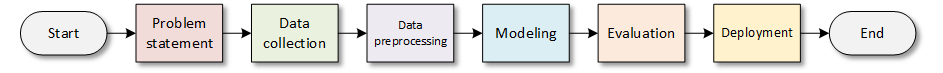

In [1]:
# Initialization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the required libraries
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

### Stage 1 Problem statement
- To predict the gender based on height and weight

### Stage 2 Data collection
- Collect the required data to solve the problem

In [3]:
# load dataset
df = read_csv("heights_weights_genders.csv")

# Check the data
print(f"Dimension of the data: {df.shape}")

# Select 5 data samples random and print them
df.sample(5)

Dimension of the data: (10000, 3)


,Height(cm),Weight(kg),Gender
6464,159.3,62.7,Female
8279,163.8,59.3,Female
6323,161.4,58.9,Female
1668,175.8,91.4,Male
8290,156.0,59.7,Female


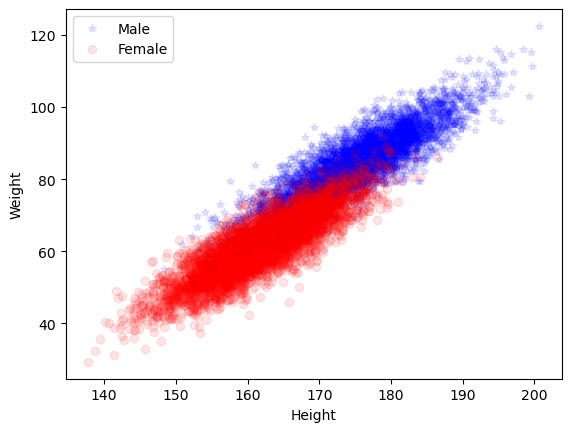

In [4]:
# Exploratory data analysis
mpos = df['Gender'] == 'Male'
fpos = df['Gender'] == 'Female'
plt.plot(df[mpos]['Height(cm)'], df[mpos]['Weight(kg)'], 'b*', alpha=0.1, label='Male')
plt.plot(df[fpos]['Height(cm)'], df[fpos]['Weight(kg)'], 'ro', alpha=0.1, label='Female')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='best')
plt.show()

### Stage 3 Data preprocessing
- Prepare the data in the appropriate format and structure

In [5]:
# Seperate the dataset into features (X) and label (y)
data = df.values
X = data[:,:2]
y = data[:,2]
print(f'X dimension: {X.shape}')
print(f'y dimension: {y.shape}')

X dimension: (10000, 2)
y dimension: (10000,)


In [6]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train dimension: {X_train.shape}')
print(f'X_test dimension: {X_test.shape}')
print(f'y_train dimension: {y_train.shape}')
print(f'y_test dimension: {y_test.shape}')

X_train dimension: (8000, 2)
X_test dimension: (2000, 2)
y_train dimension: (8000,)
y_test dimension: (2000,)


### Stage 4 Modeling
- Build the model to solve the problem

In [7]:
# KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Stage 5 Evaluation
- Evaluate the performe of the model

In [8]:
print(f'KNN accuracy: {knn.score(X_test, y_test):.2%}')

KNN accuracy: 91.70%


### Stage 6 Deployment
- Deploy the model for problem solving

In [11]:
# Make prediction based on user input
h = eval(input('Please enter height (cm): '))
w = eval(input('Please enter weight (kg): '))

res1 = knn.predict([[h, w]])
print(f'kNN predicts: {res1}')

Please enter height (cm): 180
Please enter weight (kg): 80
kNN predicts: ['Male']
